In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
#storing temp database in os memory
conn = sqlite3.connect(':memory:')

In [5]:
#importing files
fact_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\fact_table.csv')
customer_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\customer_dim.csv', encoding = 'Latin-1')
item_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\item_dim.csv', encoding = 'Latin-1')
store_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\store_dim.csv', encoding = 'Latin-1')
time_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\time_dim.csv', encoding = 'Latin-1')
trans_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\Trans_dim.csv', encoding = 'Latin-1')

In [6]:
#convering files to sql tables
fact_df.to_sql('fact',conn,index = False)
customer_df.to_sql('customer',conn,index = False)
item_df.to_sql('item',conn,index = False)
store_df.to_sql('store',conn,index = False)
time_df.to_sql('time',conn,index = False)
trans_df.to_sql('trans',conn,index = False)

39

In [7]:
#review datasets
fact_df.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [8]:
customer_df.head()

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323


In [9]:
item_df.head()

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans


In [10]:
store_df.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [11]:
store_df.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [12]:
time_df.head()

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018


In [13]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time_key  99999 non-null  object
 1   date      99999 non-null  object
 2   hour      99999 non-null  int64 
 3   day       99999 non-null  int64 
 4   week      99999 non-null  object
 5   month     99999 non-null  int64 
 6   quarter   99999 non-null  object
 7   year      99999 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


In [14]:
time_df['date'] = pd.to_datetime(time_df['date'], yearfirst=True)

C:\Users\nguye\AppData\Local\Temp\ipykernel_19236\123602086.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time_df['date'] = pd.to_datetime(time_df['date'], yearfirst=True)


In [15]:
trans_df.head()

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited


In [16]:
item_df['desc'].nunique()

30

In [17]:
# average receipt
query = '''
SELECT fact.*, time.year
FROM fact
LEFT JOIN time ON fact.time_key = time.time_key
'''
df1 = pd.read_sql_query(query,conn)

In [18]:
df1.groupby(['year'])['total_price'].mean()

year
2014    105.307968
2015    105.235524
2016    105.487683
2017    105.297967
2018    105.663552
2019    105.365799
2020    105.409486
2021    106.056912
Name: total_price, dtype: float64

In [19]:
#it appears that fact_df is the main table and others serve as a "library"

In [20]:
#To find which product brought in the most revenue and which products are sold the most
#we be using sql to query the total price and quantity of every purchases and group it per item
query = '''
SELECT total_price, item_name, quantity, desc
FROM fact
LEFT JOIN item
ON fact.item_key = item.item_key
'''
df1 = pd.read_sql_query(query,conn)

In [21]:
df1['item_name'] = df1['item_name'].astype('string')+'('+df1['desc'].astype('string')+')'

In [22]:
df1

,total_price,item_name,quantity,desc
0,35.0,M&M Peanut Candy 1.7 oz(Food - Chocolate),1,Food - Chocolate
1,26.0,Charmin Ultra Bath Tissue(Kitchen Supplies),1,Kitchen Supplies
2,100.0,Dole Fruit in Gel Cups 4.3 oz(Food - Healthy),8,Food - Healthy
3,112.0,Paper Bowls 20 oz Ultra Strong(Dishware - Bowls),8,Dishware - Bowls
4,64.0,Waterloo Sparkling Watermelon 12oz(a. Beverage...,8,a. Beverage Sparkling Water
...,...,...,...,...
999995,200.0,Red Bull 8.4 oz(Beverage - Energy/Protein),5,Beverage - Energy/Protein
999996,11.0,Dial Anti-bacterial Foam 7.5oz(Kitchen Supplies),1,Kitchen Supplies
999997,371.0,K Cups Original Donut Shop Med. Roast(Coffee K...,7,Coffee K-Cups
999998,42.0,Large Trash Bags Black 33 gal(Kitchen Supplies),2,Kitchen Supplies


In [23]:
df1 = df1.groupby('item_name').sum().sort_values(by='total_price',ascending=False)
df2 = df1.groupby('item_name').sum().sort_values(by='quantity',ascending=False)

In [24]:
import warnings 
warnings.filterwarnings('ignore')

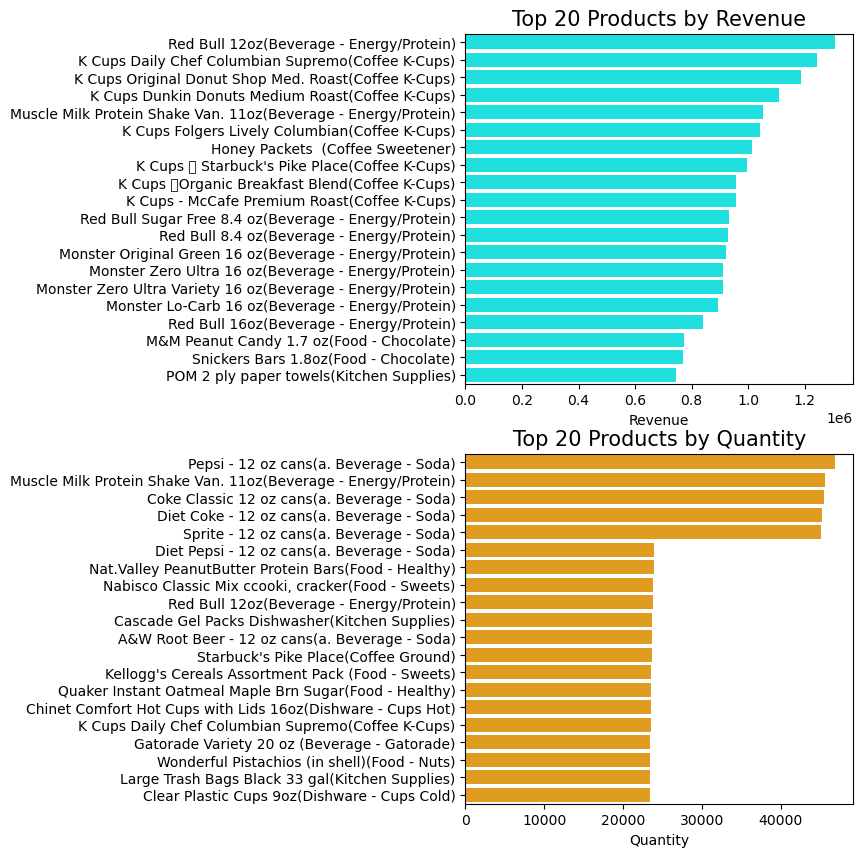

In [25]:
#to have a better understand of the tables we will visualize it side by side
plt.figure(figsize=(5,10))
plt.subplot(211)
sns.barplot(data = df1.head(20), x='total_price',y=df1.head(20).index,color = 'Cyan')
plt.title('Top 20 Products by Revenue', fontsize = 15, ha='center')
plt.xlabel('Revenue',fontsize=10,fontweight='normal')
plt.ylabel('')
plt.yticks(fontweight='light',)
plt.subplot(212)
sns.barplot(data = df2.head(20), x='quantity',y=df2.head(20).index, color = 'Orange')
plt.title('Top 20 Products by Quantity', fontsize = 15, ha='center')
plt.xlabel('Quantity',fontsize=10,fontweight='normal')
plt.ylabel('')
plt.yticks(fontweight='light',)
plt.show()

In [26]:
#to find revenue over time of the company. 
time_df['date'].max()

Timestamp('2021-01-23 04:38:00')

In [27]:
#since the lastest date is 23.01.2021, we will exclude any data pasts 31.12.2020
query = '''
SELECT fact.total_price, time.year, time.month 
FROM fact
LEFT JOIN time ON time.time_key = fact.time_key
WHERE time.year < 2021
'''
df1 = pd.read_sql_query(query,conn)

In [28]:
df1.groupby(['year'])['total_price'].sum()

year
2014    14334731.25
2015    15095720.25
2016    14976508.25
2017    15015806.00
2018    15108197.25
2019    14949510.25
2020    15037190.25
Name: total_price, dtype: float64

In [29]:
df1 = df1.groupby(['year','month']).sum()

<Axes: xlabel='year,month'>

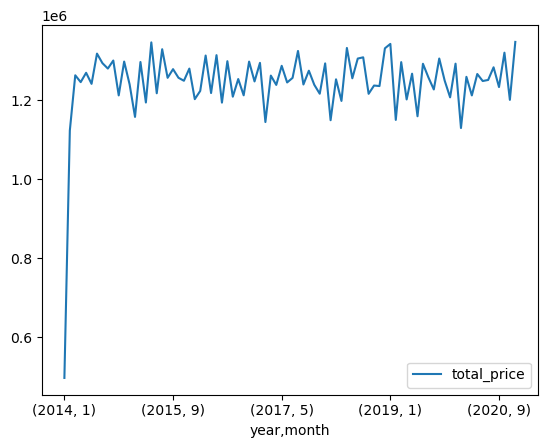

In [30]:
df1.groupby(['year','month']).sum().plot()

In [31]:
#number of customers in a year
query = '''
SELECT fact.total_price, fact.coustomer_key, time.year, time.month 
FROM fact
LEFT JOIN time ON time.time_key = fact.time_key
WHERE time.year < 2021
'''
df1 = pd.read_sql_query(query,conn)

In [32]:
df1

,total_price,coustomer_key,year,month
0,214.5,C001762,2017,5
1,184.0,C004168,2017,5
2,119.0,C006664,2017,5
3,170.0,C006857,2017,5
4,23.0,C007962,2017,5
...,...,...,...,...
991662,48.0,C006169,2017,6
991663,200.0,C006628,2017,6
991664,176.0,C007481,2017,6
991665,28.0,C007659,2017,6


In [33]:
df1.groupby('year')['coustomer_key'].nunique()

year
2014    9191
2015    9191
2016    9191
2017    9191
2018    9191
2019    9191
2020    9191
Name: coustomer_key, dtype: int64

In [34]:
df1.groupby('year').count()

,total_price,coustomer_key,month
year,,,
2014,136122,136122,136122
2015,143447,143447,143447
2016,141974,141974,141974
2017,142603,142603,142603
2018,142984,142984,142984
2019,141882,141882,141882
2020,142655,142655,142655


In [35]:
#to find Revenue by District
query = ''' 
SELECT store.division, store.district, store.upazila, fact.unit, fact.total_price
FROM fact
LEFT JOIN store ON fact.store_key = store.store_key
'''
df1 = pd.read_sql_query(query,conn)

In [36]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [37]:
import matplotlib.pyplot as plt
import squarify  
import pandas as pd

Text(0.5, 1.0, 'Revenue by District')

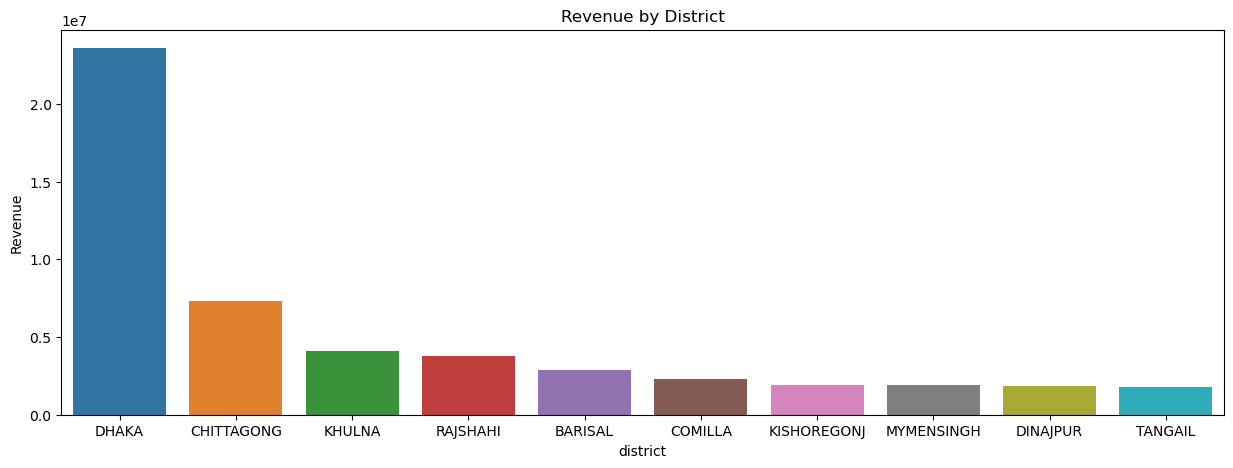

In [38]:
df1 = pd.DataFrame(df1.groupby('district')['total_price'].sum().sort_values(ascending=False).head(10))
plt.figure(figsize=(15,5))
sns.barplot(data=df1,x=df1.index,y='total_price')
plt.ylabel('Revenue')
plt.title('Revenue by District')

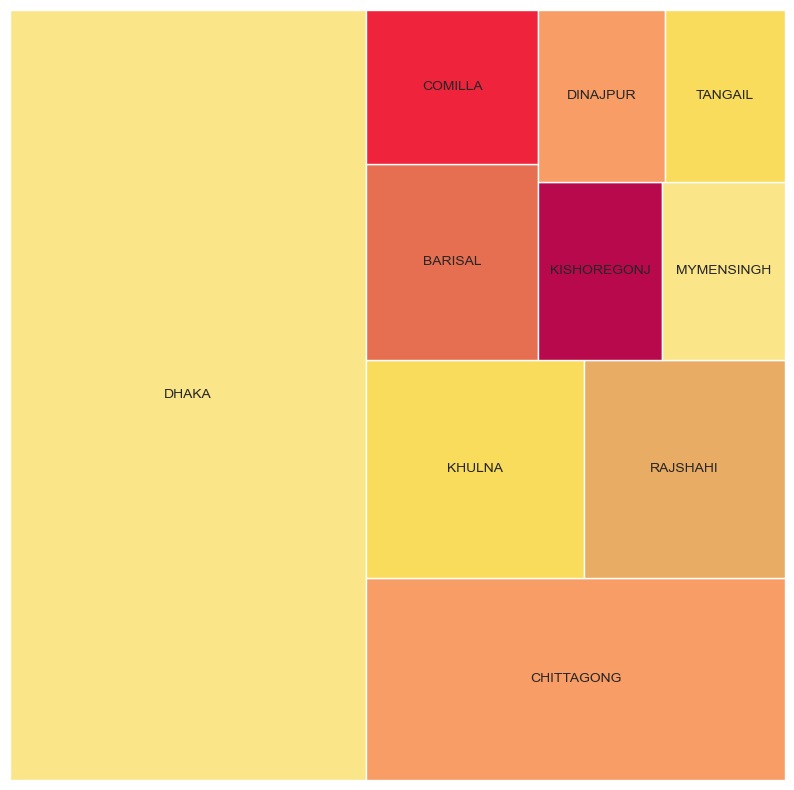

In [39]:
plt.figure(figsize=(10,10))
sns.set_style(style="whitegrid")
squarify.plot(sizes=df1['total_price'], label=df1.index,color=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'])
plt.axis('off')
plt.show()

In [40]:
# Revenue in Dhaka contribuites almost half of total revenue

In [41]:
#move further and analyze item categories to get a bigger picture
query = '''
SELECT  fact.quantity, fact.total_price, item.supplier, item.desc, item.man_country, item.item_name
FROM fact
LEFT JOIN item ON fact.item_key = item.item_key
'''
df1 = pd.read_sql_query(query,conn)

In [42]:
product_cat1 = df1.groupby('desc')[['total_price','quantity']].sum().sort_values(by='total_price', ascending=False)

Text(0, 0.5, 'Categories')

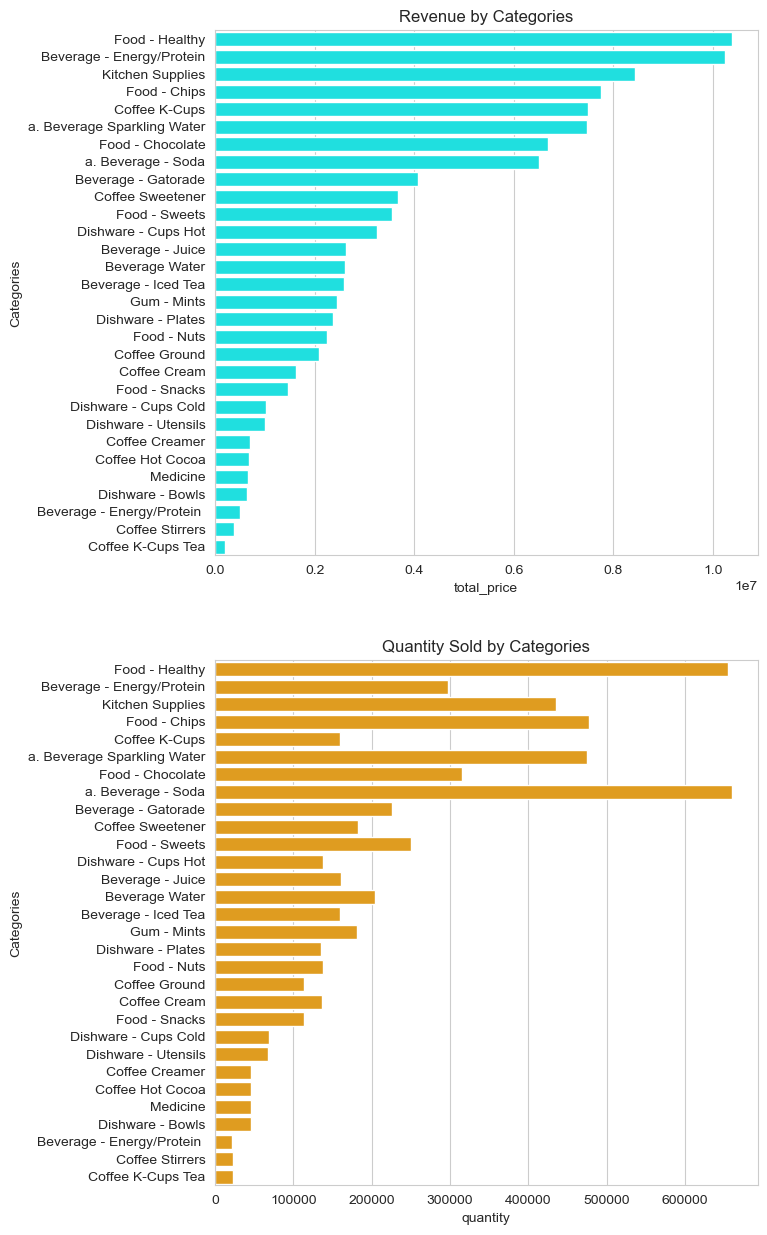

In [43]:
plt.figure(figsize=(7,15))
plt.subplot(211)
sns.barplot(data=product_cat1, x = 'total_price', y=product_cat1.index, color = 'cyan')
plt.ylabel('Categories')
plt.title('Revenue by Categories')
plt.subplot(212)
plt.title('Quantity Sold by Categories')
sns.barplot(data=product_cat1, x = 'quantity',  y=product_cat1.index, color = 'orange')
plt.ylabel('Categories')

In [44]:
#To visualize most sold categories by Division
query = '''
SELECT fact.total_price, item.desc, store.division
FROM fact
LEFT JOIN item ON fact.item_key = item.item_key
LEFT JOIN store ON fact.store_key = store.store_key
'''
df1 = pd.read_sql_query(query,conn)

In [45]:
df1 = df1.pivot_table(index='desc', columns = 'division', values = 'total_price', aggfunc='sum')
df1 = df1.sort_values(by='DHAKA', ascending=False)

In [46]:
df1.style.background_gradient(cmap='Blues')

division,BARISAL,CHITTAGONG,DHAKA,KHULNA,RAJSHAHI,RANGPUR,SYLHET
desc,,,,,,,
Food - Healthy,741490.000000,1961642.000000,3993300.000000,1117666.000000,1181985.000000,837701.500000,545253.500000
Beverage - Energy/Protein,748071.000000,1899173.000000,3964704.000000,1098413.000000,1154262.000000,829061.000000,544664.000000
Kitchen Supplies,603294.500000,1600454.000000,3248517.500000,892813.500000,970733.500000,672441.000000,446272.500000
Food - Chips,550888.000000,1466843.000000,2980093.000000,825159.000000,897394.000000,622742.000000,414288.000000
Coffee K-Cups,543727.000000,1386195.000000,2907153.000000,831649.000000,842821.000000,607941.000000,376775.000000
a. Beverage Sparkling Water,520130.000000,1398084.000000,2906874.000000,801161.000000,846332.000000,600472.000000,389449.000000
Food - Chocolate,466942.000000,1260863.000000,2586376.000000,720156.000000,777397.000000,521676.000000,356095.000000
a. Beverage - Soda,470375.500000,1204634.250000,2534986.500000,695003.250000,732646.000000,521165.500000,338620.750000
Beverage - Gatorade,287300.000000,774137.000000,1572732.500000,434203.000000,492124.500000,322764.000000,194747.500000


Text(0.5, 1.0, 'Categories/Division Heatmap')

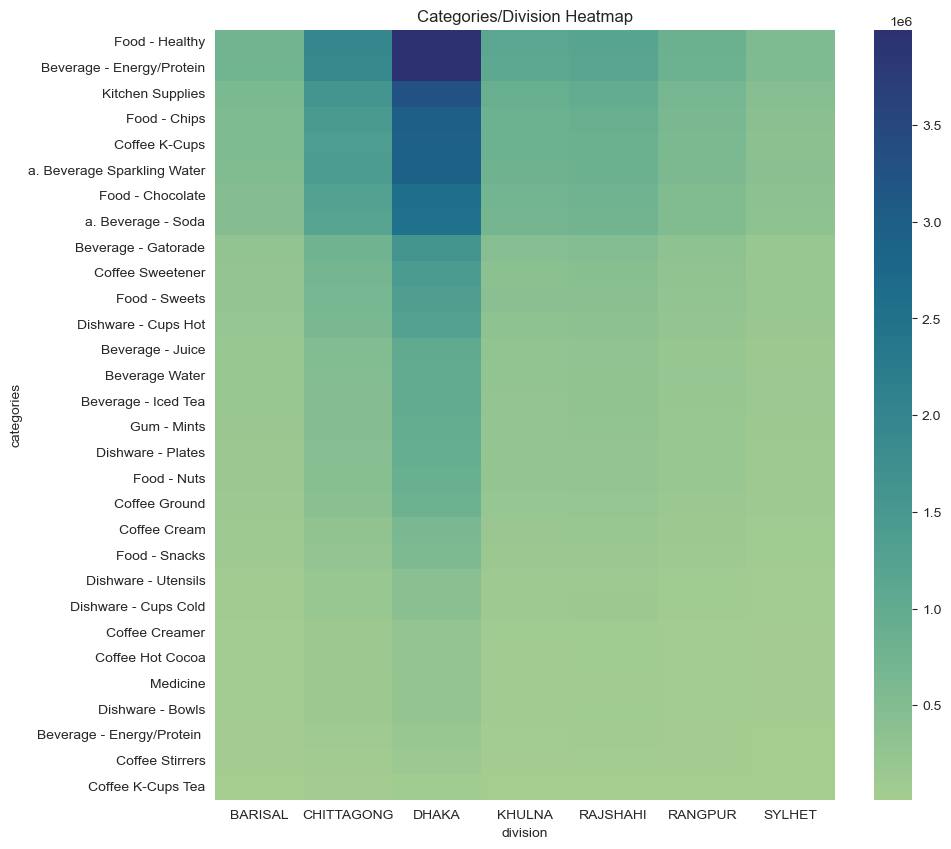

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df1,cmap='crest')
plt.ylabel('categories')
plt.title('Categories/Division Heatmap') 

In [48]:
#to find which type of transaction is dominate
query = ''' 
SELECT fact.total_price, trans.trans_type, trans.bank_name, time.year
FROM fact
LEFT JOIN trans ON fact.payment_key = trans.payment_key
LEFT JOIN time ON fact.time_key = time.time_key
WHERE time.year < 2021
'''
df1 = pd.read_sql_query(query,conn)

In [49]:
# counting how many times each type of transaction is used on yearly basis
df1 = df1.groupby(['year','trans_type']).count()

In [50]:
df1.reset_index(inplace=True)

In [51]:
df2 = df1.groupby('trans_type')['total_price'].sum()

([<matplotlib.patches.Wedge at 0x1ad1e651a10>,
 [Text(-1.0432890124576464, 0.34863739972233204, ''),
  Text(0.9292740128252176, -0.5885998718040274, ''),
  Text(1.0679175494668023, -0.26372733559648304, '')])

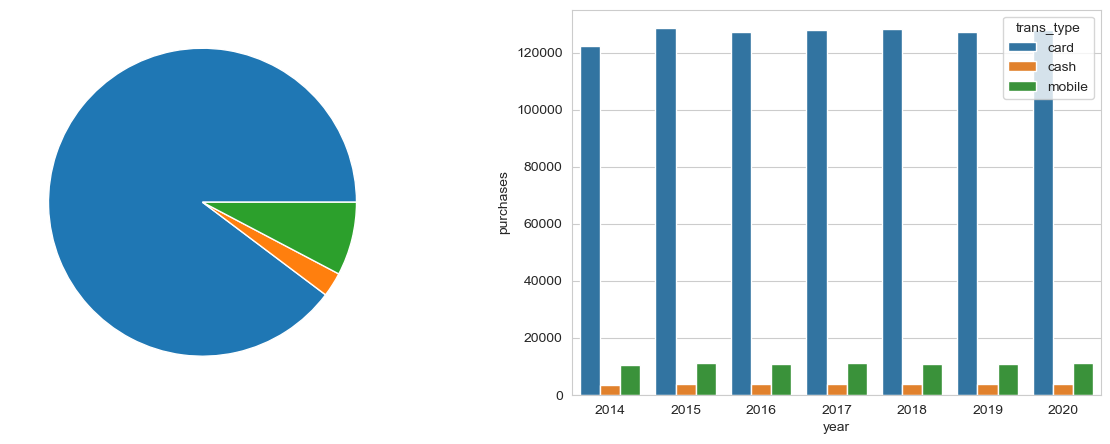

In [52]:
plt.figure(figsize = (15,5))
plt.subplot(122)
sns.barplot(data = df1, x = 'year', y = 'total_price',hue= 'trans_type')
plt.ylabel('purchases')
plt.subplot(121)
plt.pie(df2)
#no significant changes overtime

In [53]:
# checking to see if time of the day affect the purchases of item-categories
# output - hour of the day does not affect the purchases of any item-categories
query = '''
SELECT item.desc, time.hour, fact.total_price
FROM fact
LEFT JOIN item ON fact.item_key = item.item_key
LEFT JOIN time ON fact.time_key = time.time_key
'''
df1 = pd.read_sql_query(query,conn)

<Axes: xlabel='hour', ylabel='desc'>

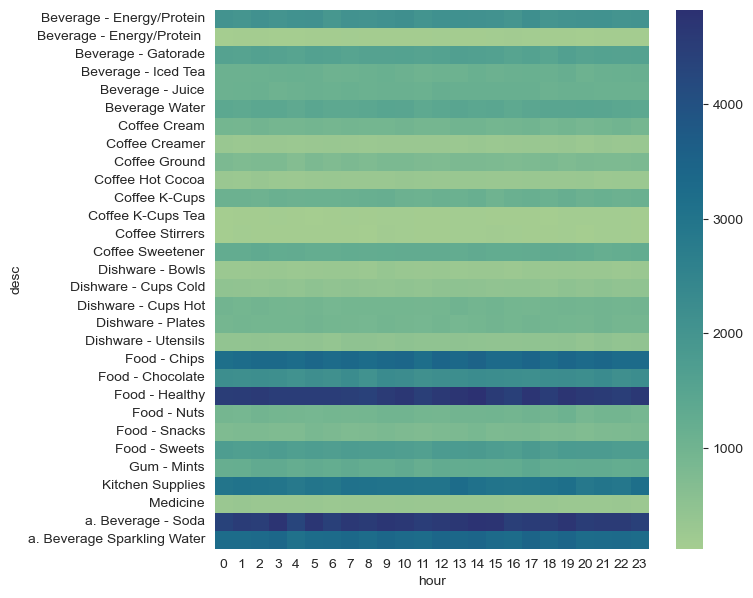

In [54]:
#we need to count how many time does the item-category apear in an hour (counting purchases)
df1 = df1.groupby(['hour','desc']).count().reset_index()
df1 = df1.pivot_table(index='desc', columns='hour',values='total_price')
plt.figure(figsize=(7,7))
sns.heatmap(df1, cmap='crest')

In [55]:
query = '''
SELECT item.desc, time.hour, fact.total_price, store.district
FROM fact
LEFT JOIN item ON fact.item_key = item.item_key
LEFT JOIN time ON fact.time_key = time.time_key
LEFT JOIN store ON fact.store_key = store.store_key
WHERE store.district == 'DHAKA'
'''
df1 = pd.read_sql_query(query,conn)

<Axes: xlabel='hour', ylabel='desc'>

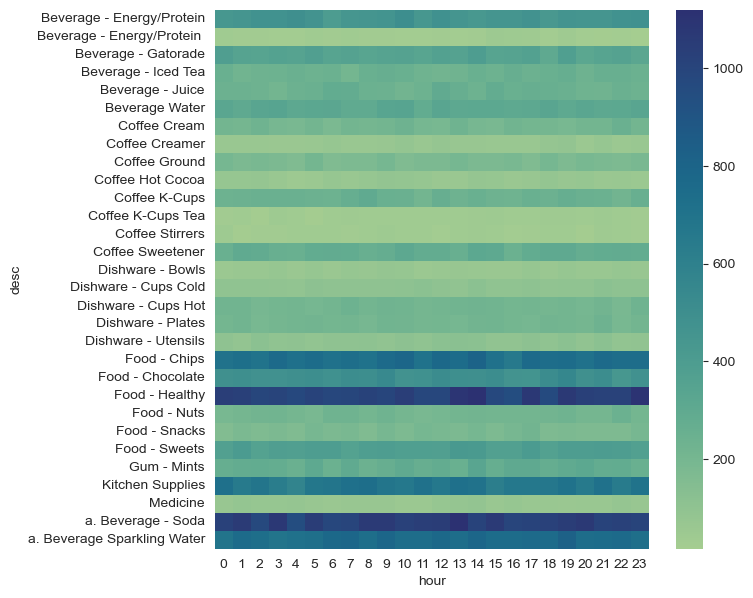

In [56]:
df1 = df1.groupby(['hour','desc']).count().reset_index()
df1 = df1.pivot_table(index='desc', columns='hour',values='total_price')
plt.figure(figsize=(7,7))
sns.heatmap(df1,cmap='crest')

In [57]:
#model to predict what is the next item that the customer would most likely to buy based on the content of their basket
#based on item/s in customer's basket, what item would you recommend them? 
#condition - customer must have at least one item in their basket.
#data - customer's purchase of multiple items at a timestamp 

In [58]:
#Models to build:
#customer segmentation 
#churn predition
#recommendation 

In [59]:
#prepare data to do Basket analysis
query = ''' 
SELECT fact.*,item.item_name, item.desc, store.district, store.upazila, time.quarter, time.year
FROM fact 
LEFT JOIN item ON fact.item_key = item.item_key
LEFT JOIN store ON fact.store_key = store.store_key
LEFT JOIN time ON fact.time_key = time.time_key
'''
df = pd.read_sql_query(query,conn)

In [60]:
#data cleaning, droping unneccasery columns
df.drop(columns = ['store_key','item_key','payment_key','quantity','unit','unit_price','total_price','time_key'],inplace=True)

In [61]:
#usually we would analyze purchases at a timestamp, but this data set does not contain multiple item type purchases but rather one item type per purchase, 
#therefore we will stream time value from timestamp to time window. 
#we have quite a lot of items, in order to reduce computational usage, we will use categories of item instead of item.
#Thus we will be analyzing 'What item categories do the customers usually buy in a quarter.'(this applies to this the given dataset only) 
df['transaction_in_quarter'] = df['coustomer_key'].astype('string')+'_'+df['quarter'].astype('string')+'_'+df['year'].astype('string')

In [62]:
#clean data
df

,coustomer_key,item_name,desc,district,upazila,quarter,year,transaction_in_quarter
0,C004510,M&M Peanut Candy 1.7 oz,Food - Chocolate,JAMALPUR,ISLAMPUR,Q2,2016,C004510_Q2_2016
1,C008967,Charmin Ultra Bath Tissue,Kitchen Supplies,DHAKA,CANTONMENT,Q2,2018,C008967_Q2_2018
2,C007261,Dole Fruit in Gel Cups 4.3 oz,Food - Healthy,NOAKHALI,BEGUMGANJ,Q4,2016,C007261_Q4_2016
3,C007048,Paper Bowls 20 oz Ultra Strong,Dishware - Bowls,RANGPUR,KAUNIA,Q1,2020,C007048_Q1_2020
4,C006430,Waterloo Sparkling Watermelon 12oz,a. Beverage Sparkling Water,KHAGRACHHARI,MATIRANGA,Q3,2014,C006430_Q3_2014
...,...,...,...,...,...,...,...,...
999995,C003726,Red Bull 8.4 oz,Beverage - Energy/Protein,NOAKHALI,SONAIMURI,Q3,2020,C003726_Q3_2020
999996,C002581,Dial Anti-bacterial Foam 7.5oz,Kitchen Supplies,SATKHIRA,ASSASUNI,Q1,2020,C002581_Q1_2020
999997,C006133,K Cups Original Donut Shop Med. Roast,Coffee K-Cups,PIROJPUR,NESARABAD (SWARUPKATI),Q4,2017,C006133_Q4_2017
999998,C008735,Large Trash Bags Black 33 gal,Kitchen Supplies,CHITTAGONG,KOTWALI,Q2,2014,C008735_Q2_2014


In [63]:
#crosstabulation to count how many times each item has appeared in 1 quarter
df2 = pd.crosstab(df['transaction_in_quarter'], df['desc'])
df2.head() 

desc,Beverage - Energy/Protein,Beverage - Energy/Protein,Beverage - Gatorade,Beverage - Iced Tea,Beverage - Juice,Beverage Water,Coffee Cream,Coffee Creamer,Coffee Ground,Coffee Hot Cocoa,...,Food - Chocolate,Food - Healthy,Food - Nuts,Food - Snacks,Food - Sweets,Gum - Mints,Kitchen Supplies,Medicine,a. Beverage - Soda,a. Beverage Sparkling Water
transaction_in_quarter,,,,,,,,,,,,,,,,,,,,,
C000001_Q1_2014,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
C000001_Q1_2015,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,2
C000001_Q1_2017,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
C000001_Q1_2018,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
C000001_Q1_2019,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [64]:
# to use Apriori model we have to convert data to Bool type. 
# note that this action in a normal dataset would mean that whether the customer has the item-type in their basket or not.
# though due to the reasons mentioned above, the output would mean that whether the customer has purchased this item-category or not in the past Quarter
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = df2.applymap(encode)

In [65]:
#output: 1 - this person has purchased this item-category in the past quarter. 0 - has not purchased
basket_input

desc,Beverage - Energy/Protein,Beverage - Energy/Protein,Beverage - Gatorade,Beverage - Iced Tea,Beverage - Juice,Beverage Water,Coffee Cream,Coffee Creamer,Coffee Ground,Coffee Hot Cocoa,...,Food - Chocolate,Food - Healthy,Food - Nuts,Food - Snacks,Food - Sweets,Gum - Mints,Kitchen Supplies,Medicine,a. Beverage - Soda,a. Beverage Sparkling Water
transaction_in_quarter,,,,,,,,,,,,,,,,,,,,,
C000001_Q1_2014,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
C000001_Q1_2015,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
C000001_Q1_2017,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
C000001_Q1_2018,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
C000001_Q1_2019,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C009191_Q4_2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
C009191_Q4_2017,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
C009191_Q4_2018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#throwing clean data into the machine
frequent_itemsets = apriori(basket_input.head(100000), min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.head()

In [ ]:
#Sorting by lift to get higher correlated combinations
rules.sort_values(["lift"],axis = 0, ascending = False).head(8)

In [ ]:
# item recommendation - Content-Based Filtering

In [ ]:
#data cleaning
df = item_df[['item_name','desc']]
df

In [ ]:
#creating descriptions of items (Content) based on existing data
df['concat'] = df['item_name'].astype('string')+' '+df['desc'].astype('string')
df['concat'] = df['concat'].str.lower()

In [ ]:
df

In [ ]:
# Counting letters in that appeared in column "concat" and vectorizing each value
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(df['concat'])

In [ ]:
#the closers the vectors are to each other, the closer the similarities (1 is duplicate, 0 no similarities)
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(vectorized)

In [ ]:
print(similarities)

In [ ]:
#applying axis x and y 
df = pd.DataFrame(similarities, columns=df['item_name'], index=df['item_name']).reset_index()

df.head()

In [ ]:
input_item = str(input())
#sorting values from closest to 1 to closest to 0
recommendations = pd.DataFrame(df.sort_values(by=input_item,ascending=False)['item_name'])
#filtering duplicated outputs
recommendations = recommendations[(recommendations['item_name']!=input_item)&(recommendations['item_name'].duplicated() == False)]
print(recommendations.head(10))